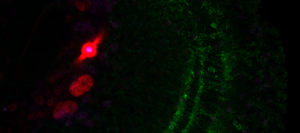

In [8]:
from PIL import Image 
image = Image.open(r"/groups/scicompsoft/home/rokickik/data/zMAX-NP02_R1_2_4_SS01019_DH31_546_DH44_647_095x_ROL2.png") 
MAX_SIZE = (300, 300) 
  
image.thumbnail(MAX_SIZE) 
  
# creating thumbnail 
#image.save('pythonthumb.png') 
display(image)

In [9]:
# From https://note.nkmk.me/en/python-pillow-add-margin-expand-canvas/
def expand2square(pil_img, background_color):
    width, height = pil_img.size
    if width == height:
        return pil_img
    elif width > height:
        result = Image.new(pil_img.mode, (width, width), background_color)
        result.paste(pil_img, (0, (width - height) // 2))
        return result
    else:
        result = Image.new(pil_img.mode, (height, height), background_color)
        result.paste(pil_img, ((height - width) // 2, 0))
        return result


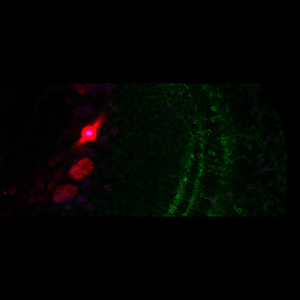

In [10]:
im = Image.open(r"/groups/scicompsoft/home/rokickik/data/zMAX-NP02_R1_2_4_SS01019_DH31_546_DH44_647_095x_ROL2.png") 
im_new = expand2square(im, (0, 0, 0)).resize(MAX_SIZE)
display(im_new)

In [1]:
# Import necessary libraries
import os
import matplotlib.pyplot as plt
from PIL import Image

# Define the directory to search for PNG files
directory = '/nearline/flynp/EASI-FISH_NP_SS_OMEZarr/.zarrcade/NP17_R3_20231127'  # Replace with your directory path

# List all PNG files in the directory
png_files = [f for f in os.listdir(directory) if f.endswith('.png')]

# Display the first 5 images
for i, file in enumerate(png_files[:5]):
    img_path = os.path.join(directory, file)
    img = Image.open(img_path)
    
    # Plot the image
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.title(f'Image {i + 1}: {file}')
    plt.axis('off')
    plt.show()

ModuleNotFoundError: No module named 'matplotlib'

In [26]:

# Load the image
img_path = '/nearline/flynp/EASI-FISH_NP_SS/NP01_R1_20230906/zMAX-NP01_R1_4_5_SS00317_Spab_546_Tk_647_100x_LOL.png'
img = cv2.imread(img_path)

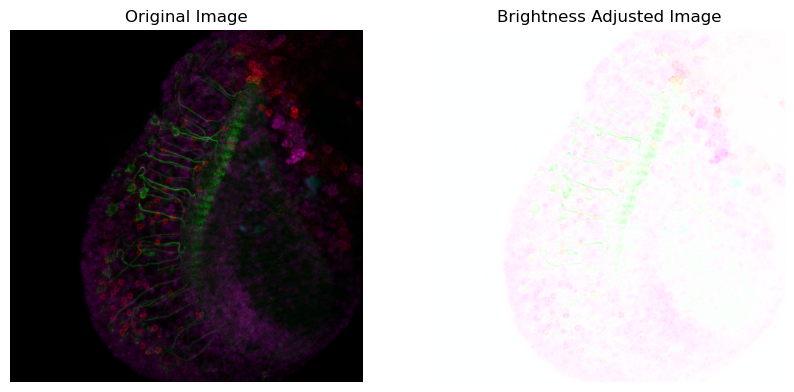

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to adjust brightness using histogram
def adjust_brightness(img, alpha):
    # Convert the image to YUV color space
    yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    y = yuv[:,:,0]  # Extract the Y channel (brightness)
    
    # Compute the histogram of the Y channel
    hist, bins = np.histogram(y.flatten(), 256, [0,256])
    
    # Apply brightness adjustment
    cdf = hist.cumsum()  # Compute the cumulative distribution function (CDF)
    cdf_normalized = cdf * hist.max() / cdf.max()  # Normalize the CDF
    
    # Adjust the CDF
    cdf_adjusted = np.clip(cdf * alpha, 0, 255).astype('uint8')
    
    # Map the old values to the new values using the adjusted CDF
    y_adjusted = cdf_adjusted[y]
    
    # Update the Y channel with the adjusted values
    yuv[:,:,0] = y_adjusted
    
    # Convert back to BGR color space
    img_adjusted = cv2.cvtColor(yuv, cv2.COLOR_YUV2BGR)
    return img_adjusted


# Adjust the brightness
alpha = 0.1  # Factor to adjust brightness; >1 to increase, <1 to decrease
img_brightened = adjust_brightness(img, alpha)

# Display the original and adjusted images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_brightened, cv2.COLOR_BGR2RGB))
plt.title('Brightness Adjusted Image')
plt.axis('off')

plt.show()

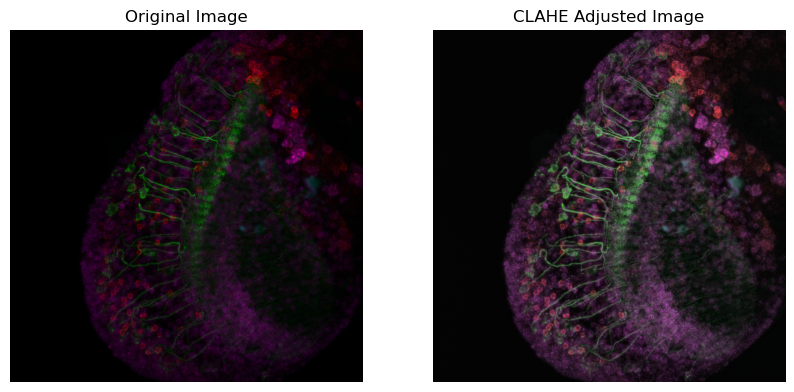

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to apply CLAHE to an image
def apply_clahe(img, clip_limit=2.0, tile_grid_size=(8, 8)):
    # Convert the image to YUV color space
    yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    y = yuv[:,:,0]  # Extract the Y channel (brightness)
    
    # Apply CLAHE to the Y channel
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    y_clahe = clahe.apply(y)
    
    # Update the Y channel with the CLAHE output
    yuv[:,:,0] = y_clahe
    
    # Convert back to BGR color space
    img_clahe = cv2.cvtColor(yuv, cv2.COLOR_YUV2BGR)
    return img_clahe

# Load the image
img = cv2.imread(img_path)

# Apply CLAHE
img_clahe = apply_clahe(img)

# Display the original and CLAHE adjusted images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_clahe, cv2.COLOR_BGR2RGB))
plt.title('CLAHE Adjusted Image')
plt.axis('off')

plt.show()

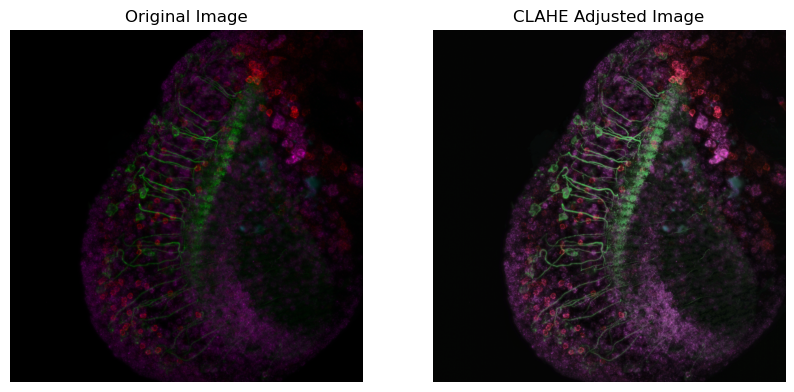

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to apply CLAHE to an image
def apply_clahe(img, clip_limit=2.0, tile_grid_size=(8, 8)):
    # Convert the image to YUV color space
    lab = cv2.cvtColor(img, cv2.COLOR_RGB2Lab)
    b = lab[:,:,0]  # Extract the B channel (brightness)
    
    # Apply CLAHE to the Y channel
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    b_clahe = clahe.apply(b)
    
    # Update the B channel with the CLAHE output
    lab[:,:,0] = b_clahe
    
    # Convert back to BGR color space
    img_clahe = cv2.cvtColor(lab, cv2.COLOR_Lab2RGB)
    return img_clahe


# Load the image
img = cv2.imread(img_path)

# Apply CLAHE
img_clahe = apply_clahe(img)

# Display the original and CLAHE adjusted images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_clahe, cv2.COLOR_BGR2RGB))
plt.title('CLAHE Adjusted Image')
plt.axis('off')

plt.show()

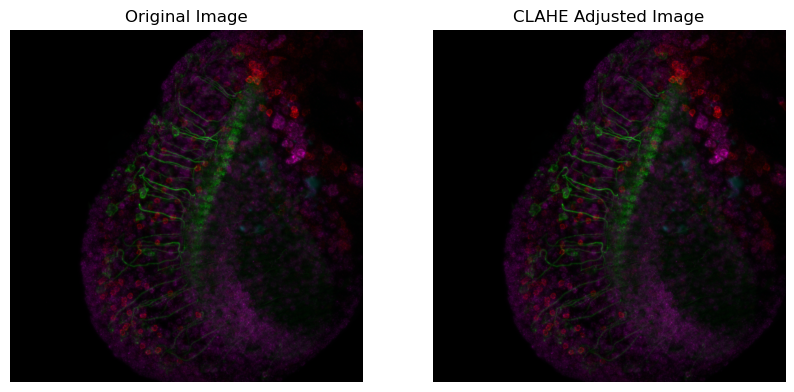

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to apply CLAHE to an image
def apply_clahe(img2, clip_limit=20.0, tile_grid_size=(18, 18)):
    
    img_clahe = img.copy()
    r = img_clahe[0,:,:]
    g = img_clahe[1,:,:]
    b = img_clahe[2,:,:]

    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    img_clahe[0,:,:] = clahe.apply(r)
    img_clahe[1,:,:] = clahe.apply(b)
    img_clahe[2,:,:] = clahe.apply(g)
    
    return img_clahe


# Load the image
img = cv2.imread(img_path)

# Apply CLAHE
img_clahe = apply_clahe(img)

# Display the original and CLAHE adjusted images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_clahe, cv2.COLOR_BGR2RGB))
plt.title('CLAHE Adjusted Image')
plt.axis('off')

plt.show()

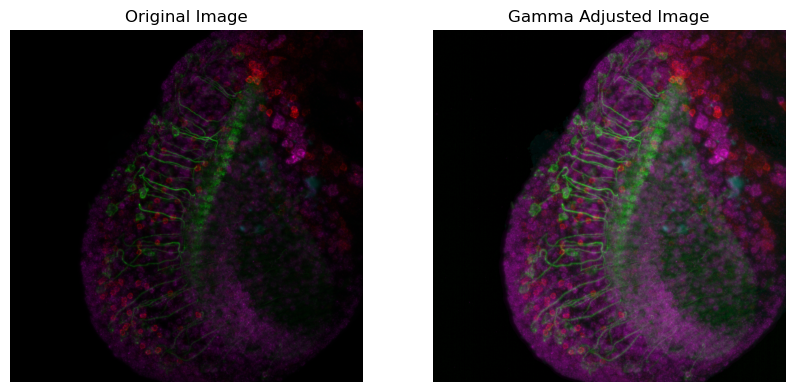

In [40]:

import numpy as np
import argparse
import cv2
def adjust_gamma(image, gamma=1.0):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	# apply gamma correction using the lookup table
	return cv2.LUT(image, table)


# Load the image
img = cv2.imread(img_path)

# Apply Gamme correction
img_clahe = adjust_gamma(img, gamma=1.8)
cv2.imwrite("gamma.png", img_clahe)

# Display the original and CLAHE adjusted images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_clahe, cv2.COLOR_BGR2RGB))
plt.title('Gamma Adjusted Image')
plt.axis('off')

plt.show()

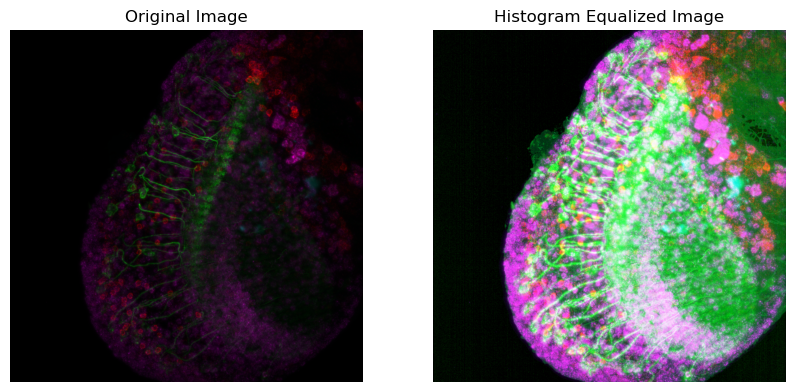

In [42]:
import os
import numpy as np
import cv2

def equalize_histogram(img):
    B, G, R = cv2.split(img)
    B = cv2.equalizeHist(B)
    G = cv2.equalizeHist(G)
    R = cv2.equalizeHist(R)
    out = cv2.merge((B,G,R))
    return out


# Load the image
img = cv2.imread(img_path)

# Apply histogram equalization
img_clahe = equalize_histogram(img)
cv2.imwrite("gamma.png", img_clahe)

# Display the original and CLAHE adjusted images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_clahe, cv2.COLOR_BGR2RGB))
plt.title('Histogram Equalized Image')
plt.axis('off')

plt.show()



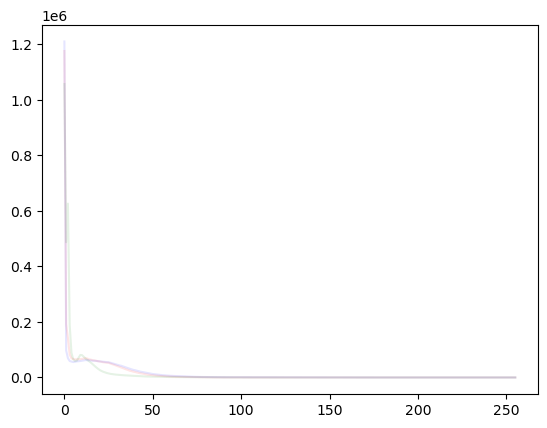

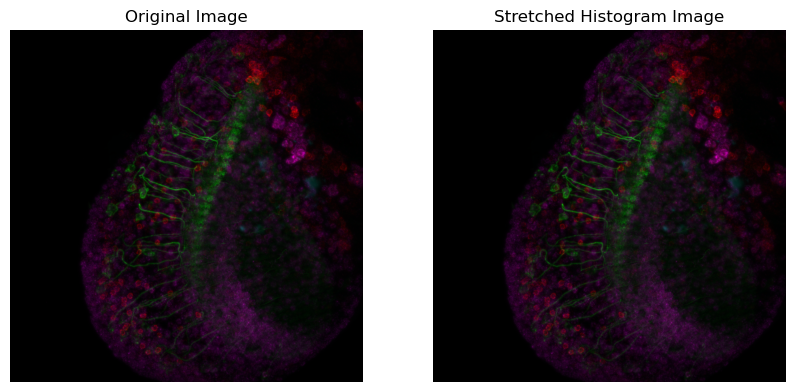

In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as pltt



# Load the image
img = cv2.imread(img_path)

# Split the channels into red, green, and blue
r, g, b = cv2.split(img)

# Split the image into color channels
#r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]

# Plot the histograms for each channel
hist_r = np.zeros(256)
hist_g = np.zeros(256)
hist_b = np.zeros(256)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        hist_r[r[i,j]] += 1
        hist_g[g[i,j]] += 1
        hist_b[b[i,j]] += 1

pltt.plot(hist_r, color='red', alpha=0.10)
pltt.plot(hist_g, color='green', alpha=0.10)
pltt.plot(hist_b, color='blue', alpha=0.10)
pltt.show()

# Stretch the contrast for each channel
min_r, max_r = np.min(r), np.max(r)
min_g, max_g = np.min(g), np.max(g)
min_b, max_b = np.min(b), np.max(b)

re_stretch = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
gr_stretch = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
bl_stretch = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        re_stretch[i,j] = int((r[i,j] - min_r) * 255 / (max_r - min_r))
        gr_stretch[i,j] = int((g[i,j] - min_g) * 255 / (max_g - min_g))
        bl_stretch[i,j] = int((b[i,j] - min_b) * 255 / (max_b - min_b))

# Merge the channels back together
img2 = cv2.merge((re_stretch, gr_stretch, bl_stretch))

cv2.imwrite("gamma.png", img2)

# Display the original and CLAHE adjusted images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title('Stretched Histogram Image')
plt.axis('off')

plt.show()


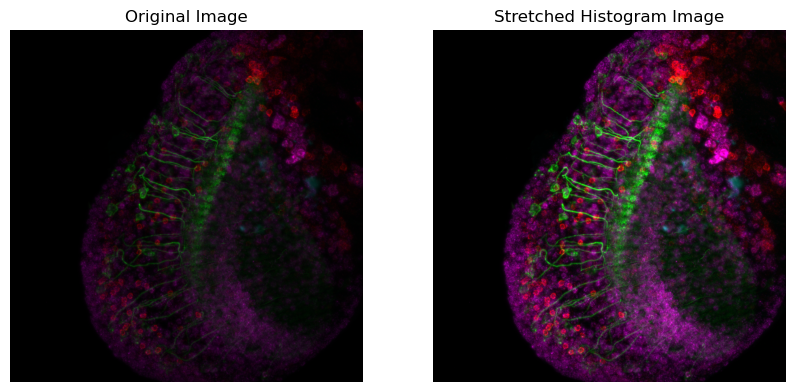

In [83]:
# From https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_equalize.html

import skimage as ski
from skimage import exposure

img = ski.io.imread(img_path)
p_lower, p_upper = np.percentile(img, (0, 99.90))
img_rescale = exposure.rescale_intensity(img, in_range=(p_lower, p_upper))


ski.io.imsave("gamma.png", img_rescale)

# Display the original and CLAHE adjusted images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_rescale, cmap=plt.cm.gray)
plt.title('Stretched Histogram Image')
plt.axis('off')

plt.show()
